In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [56]:
list=[]
for i in range(1,2):
  with open(f'/Users/chiararizzato/Downloads/peeringdb_2_dump_2024_01_{i:02d}.json') as file: 
    doc=json.load(file)
  dfPeering=pd.DataFrame.from_records(doc['net']['data'],index='id')
  list.append(dfPeering)

dfPeering=pd.concat(list)

dfPeering=dfPeering[['asn','name','info_type']]

In [78]:
df = pd.read_csv("/Users/chiararizzato/Downloads/data.csv")
df=df.set_index('asn').join(dfPeering.set_index('asn'))
df.head(10)

,type,provider_free,tier1_free,hierachy_free,total,name,info_type
asn,,,,,,,
615,other,2,2,2,75982,NaN,NaN
23815,other,36815,36815,34340,75982,JPIX Route Servers,Route Server
17267,other,1,1,1,75982,NaN,NaN
396530,other,1,1,1,75982,NaN,NaN
328711,other,1,1,1,75982,Intaweb,Cable/DSL/ISP
21345,other,1,1,1,75982,Broadcom (EMEA),Content
30781,other,62912,58354,42927,75982,Free PRO,NSP
44440,other,1,1,1,75982,NaN,NaN
46624,other,1,1,1,75982,NaN,NaN


In [79]:
df=df[df['type'] != 'other']
df=df.sort_values(by='hierachy_free',ascending=False)
print(len(df))
df=df.head(30)

53


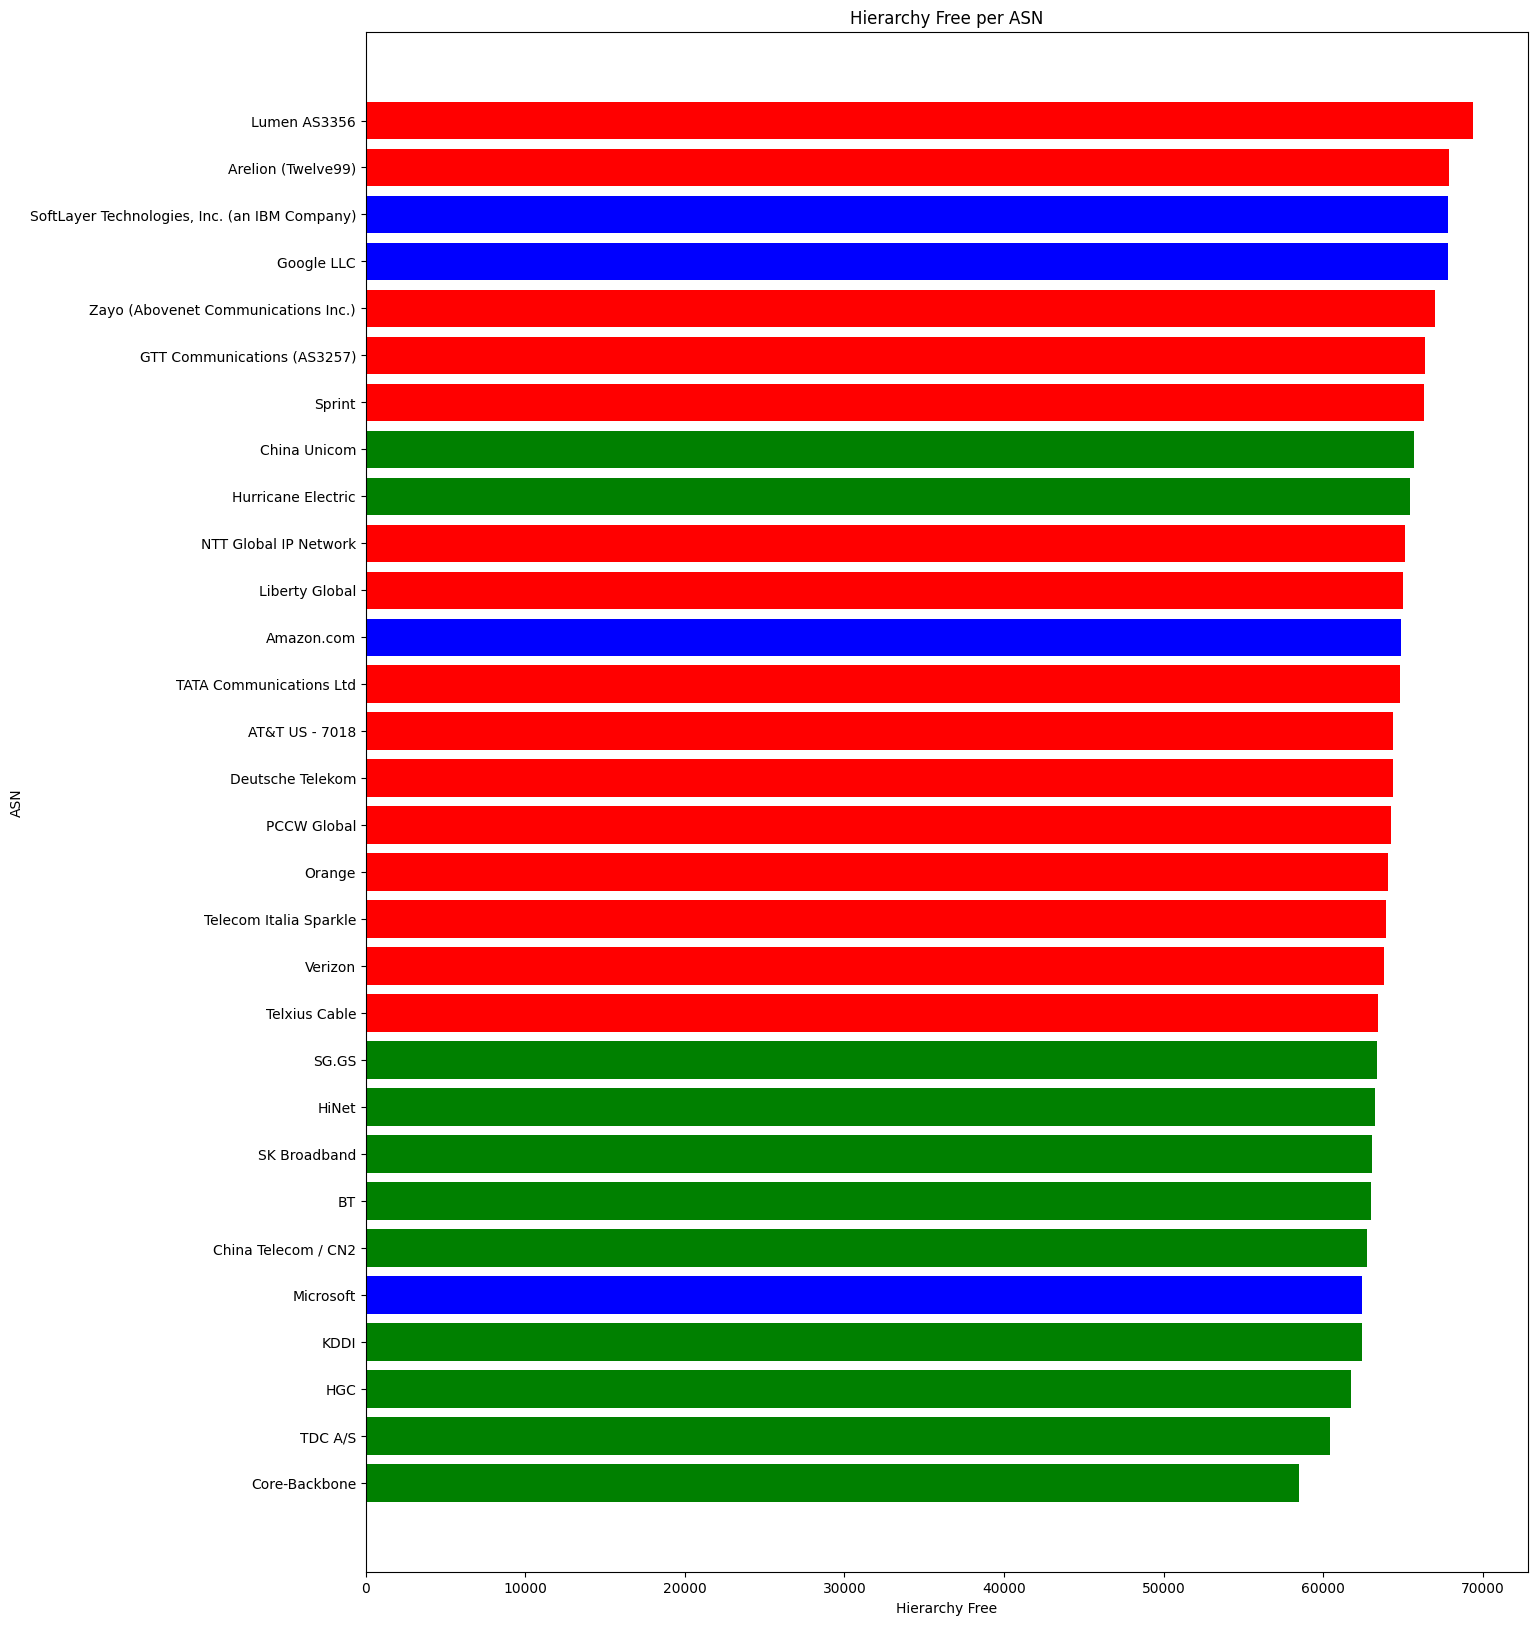

In [80]:
fig, ax = plt.subplots(figsize=(15, 20))

color_map= {'cloud_provider': 'blue','tier1':'red','tier2':'green','other':'gray'}
df['color']=df['type'].map(color_map)

ax.barh(df['name'].astype(str), df['hierachy_free'], align='center',color=df['color'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Hierarchy Free')
ax.set_ylabel('ASN')
ax.set_title('Hierarchy Free per ASN')

plt.show()